In [90]:
import matplotlib.pyplot as plt

def plot_compare(x, y1, y2, color1: str, color2: str, label1: str, label2: str, 
                 title: str, xlabel: str, ylabel: str):
    plt.figure()
    plt.plot(x, y1, color=color1, label=label1)
    plt.plot(x, y2, color=color2, label=label2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [91]:
import pandas as pd

df = pd.read_csv('card_transdata.csv')

Fraudulentas: 87403, autênticas: 912597 


In [92]:
#reparte em frações de 60000 negativos e 40000 positivos
x_train = df[df['fraud'] == 1].sample(n=40000, random_state=42) 
x_train = pd.concat([x_train, df[df['fraud'] == 0].sample(n=60000, random_state=42)], axis=0)
x_train = x_train.sample(frac=1).reset_index(drop=True)

y_train = x_train['fraud']
#print(x_train['fraud'], y_train)

#dropa a coluna de classe
x_train = x_train.drop('fraud', axis=1)

#tira as linhas de treinamento do conjunto de teste
x_test = df.drop(x_train.index)

#guarda o y test e dropa a coluna de classe
y_test = x_test['fraud']
x_test = x_test.drop('fraud', axis=1)

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Criar o modelo sequencial
model = Sequential()

# Adicionar as camadas ocultas
model.add(Dense(64, activation='relu', input_dim=7))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))

# Adicionar a camada de saída com ativação sigmoid para classificação binária
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Fazer previsões
y_pred = model.predict(x_test)


Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.2185 - accuracy: 0.9221 - val_loss: 0.1090 - val_accuracy: 0.9573
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.9683 - val_loss: 0.1041 - val_accuracy: 0.9650
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.0732 - accuracy: 0.9743 - val_loss: 0.0885 - val_accuracy: 0.9624
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.0574 - accuracy: 0.9795 - val_loss: 0.0375 - val_accuracy: 0.9861
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.0483 - accuracy: 0.9826 - val_loss: 0.0313 - val_accuracy: 0.9898
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.0433 - accuracy: 0.9843 - val_loss: 0.0298 - val_accuracy: 0.9893
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.0393 - accuracy: 0.9854 - val_loss: 0.0189 - val_accuracy: 0.9936
Epoch 

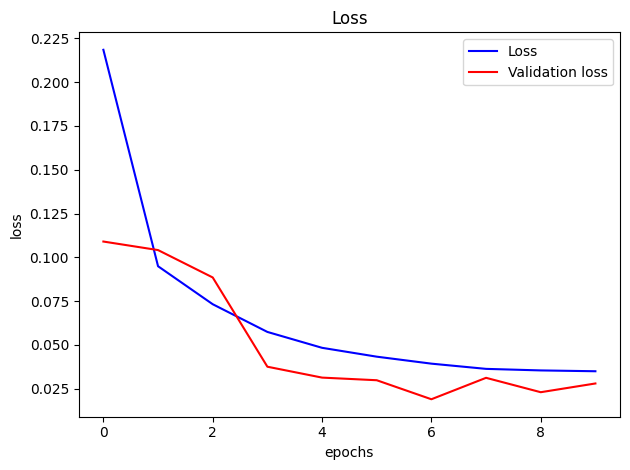

In [94]:
import matplotlib.pyplot as plt

hist = history.history
hist_df = pd.DataFrame(hist)
plot_compare(range(len(hist_df)), hist_df['loss'], hist_df['val_loss'], 
             color1='blue', color2='red', label1='Loss', label2='Validation loss', 
             title='Loss', xlabel='epochs', ylabel='loss')

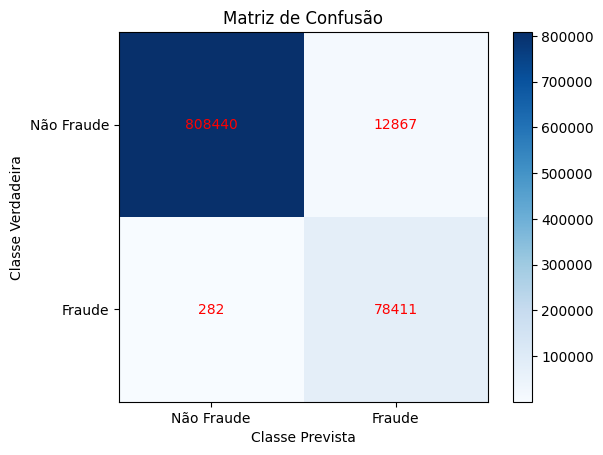

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, np.where(y_pred > 0.5, 1, 0))

# Definir rótulos das classes (fraude e não fraude)
class_labels = ['Não Fraude', 'Fraude']

# Plotar a matriz de confusão em um heatmap
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.colorbar()
plt.show()
